In [ ]:
! pip install gym

In [3]:
import numpy as np 
from gym import spaces 
import matplotlib.pyplot as plt


In [5]:
grid = np.zeros((4,4))
print(grid)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


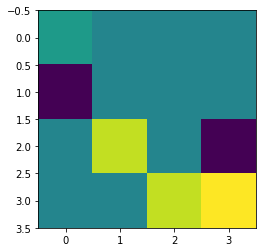

In [6]:
pos1 = [0,0]
posr1 = [1,0]
posr2 = [2,3]
posb1 = [2,1]
posb2 = [3,2]
pos2 = [3,3]
grid[tuple(pos1)] = 1
grid[tuple(pos2)] = 6
grid[tuple(posr1)] = -5
grid[tuple(posr2)] = -5
grid[tuple(posb1)] = 5
grid[tuple(posb2)] = 5
plt.imshow(grid)

In [38]:
class GridWorld_Env:
    def __init__(self) -> None:
      super().__init__()
      self.obs_space = spaces.Discrete(16)
      self.act_space = spaces.Discrete(4)
      self.max_tSteps = 20
    # reset the agent when an episode begins    
    def reset(self):
        self.tStep = 0
        self.agentPos = [0,0]
        self.finalPos = [3,3]
        self.posrock1 = [1,0]
        self.posrock2 = [2,3]
        self.posbatt1 = [2,1]
        self.posbatt2 = [3,2]
        pos= self.agentPos[0]*4+self.agentPos[1]
        self.state = np.zeros((4,4))
        self.state[tuple(self.agentPos)] = 1
        self.state[tuple(self.finalPos)] = 6
        self.state[tuple(self.posrock1)] = -5
        self.state[tuple(self.posrock2)] = -5
        self.state[tuple(self.posbatt1)] = 5
        self.state[tuple(self.posbatt2)] = 5
        obs = self.state.flatten()
        return pos

    # Agent takes the step, i.e. take action to interact with 
      
    def step(self, action):
        if action == 0: #down
          self.agentPos[0] +=1
          if self.agentPos[0] == 4:
            self.agentPos[0] -=1
        elif action == 1: #up
          self.agentPos[0] -=1
          if self.agentPos[0] == -1:
            self.agentPos[0] +=1
        elif action == 2: #right
          self.agentPos[1] +=1
          if self.agentPos[1] == 4:
            self.agentPos[1] -=1
        else: #left
          self.agentPos[1] -=1
          if self.agentPos[1] == -1:
            self.agentPos[1] +=1
        self.agentPos = np.clip(self.agentPos,0,3)
        self.state = np.zeros((4,4))
        self.finalPos = [3,3]
        self.posrock1 = [1,0]
        self.posrock2 = [2,3]
        self.posbatt1 = [2,1]
        self.posbatt2 = [3,2]
        self.state[tuple(self.agentPos)] = 1
        self.state[tuple(self.finalPos)] = 6
        self.state[tuple(self.posrock1)] = -5
        self.state[tuple(self.posrock2)] = -5
        self.state[tuple(self.posbatt1)] = 5
        self.state[tuple(self.posbatt2)] = 5
        obs = self.state.flatten()
        reward = 0
        s_table=np.array([[0,1,2,3],[4,5,6,7],[8,9,10,11],[12,13,14,15]])
        npos = s_table[tuple(self.agentPos)]

        # r_table= np.array([[0,0,0,0],[-5,0,0,0],[0,5,0,-5],[0,0,5,6]])
        # reward= r_table[tuple(self.agentPos)]
        flag1 = 0
        flag2 = 0
        # flag3 = 0
        # flag4 = 0
        if (self.agentPos == self.finalPos).all():
          reward += 6
        if (self.agentPos == self.posrock1).all():
          reward -=5
        if (self.agentPos == self.posrock2).all():
          reward -=5
        if (self.agentPos == self.posbatt1).all() and flag1 ==0:
          flag1 = 1
          reward +=5
        if (self.agentPos == self.posbatt2).all() and flag2 == 0:
          flag2 =1
          reward +=5
        self.tStep +=1
        done = True if (self.agentPos == self.finalPos).all() else False
        done = True if self.tStep>=self.max_tSteps else done
        return npos,reward,done
    def render(self):
      plt.imshow(self.state)


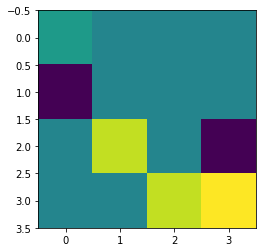

In [36]:
grid_env = GridWorld_Env()
a = grid_env.reset()
grid_env.render()

In [9]:
import  matplotlib.pyplot as plt

reward for action:   0
final reward:   0


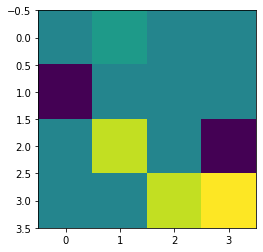

In [10]:
action = 2
final_rew = 0
observation,reward,done = grid_env.step(action)
grid_env.render()
print("reward for action:  ",reward)
final_rew += reward 
print("final reward:  ",final_rew)

reward for action:   0
final reward:   0


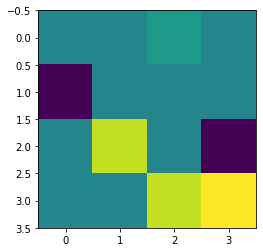

In [11]:
action = 2
observation,reward,done = grid_env.step(action)
grid_env.render()
print("reward for action:  ",reward)
final_rew += reward 
print("final reward:  ",final_rew)

reward for action:   0
final reward:   0


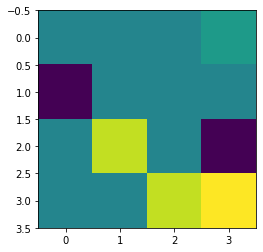

In [12]:
action = 2
observation,reward,done = grid_env.step(action)
grid_env.render()
print("reward for action:  ",reward)
final_rew += reward 
print("final reward:  ",final_rew)

reward for action:   0
final reward:   0


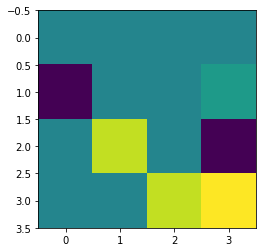

In [13]:
action = 0
observation,reward,done = grid_env.step(action)
grid_env.render()
print("reward for action:  ",reward)
final_rew += reward 
print("final reward:  ",final_rew)

reward for action:   0
final reward:   0


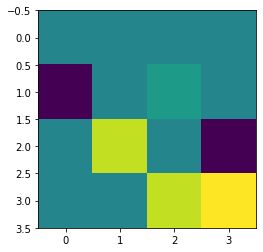

In [14]:
action = 3
observation,reward,done = grid_env.step(action)
grid_env.render()
print("reward for action:  ",reward)
final_rew += reward 
print("final reward:  ",final_rew)

reward for action:   0
final reward:   0


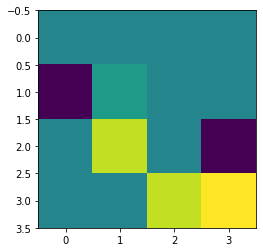

In [15]:
action = 3
observation,reward,done = grid_env.step(action)
grid_env.render()
print("reward for action:  ",reward)
final_rew += reward 
print("final reward:  ",final_rew)

reward for action:   10
final reward:   10


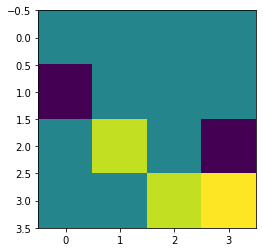

In [16]:
action = 0
observation,reward,done = grid_env.step(action)
grid_env.render()
print("reward for action:  ",reward)
final_rew += reward 
print("final reward:  ",final_rew)

reward for action:   0
final reward:   10


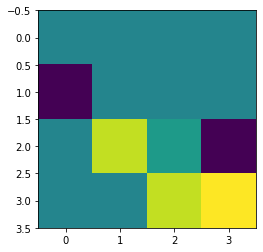

In [17]:
action = 2
observation,reward,done = grid_env.step(action)
grid_env.render()
print("reward for action:  ",reward)
final_rew += reward 
print("final reward:  ",final_rew)

reward for action:   10
final reward:   20


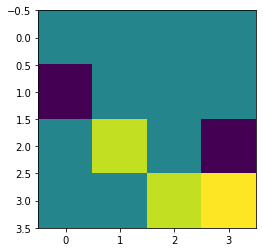

In [18]:
action = 0
observation,reward,done = grid_env.step(action)
grid_env.render()
print("reward for action:  ",reward)
final_rew += reward 
print("final reward:  ",final_rew)

reward for action:   12
final reward:   32


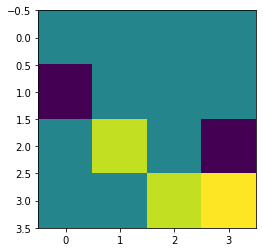

In [19]:
action = 2
observation,reward,done = grid_env.step(action)
grid_env.render()
print("reward for action:  ",reward)
final_rew += reward 
print("final reward:  ",final_rew)

In [20]:
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.obs_space = env.obs_space
    self.act_space = env.act_space

  def step(self, observation):
    return np.random.choice(self.act_space.n)

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

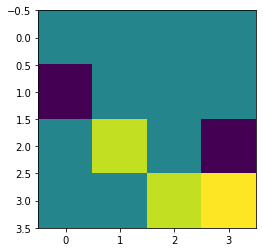

<IPython.core.display.Javascript object>

In [25]:
from google.colab import widgets
import time
env = GridWorld_Env()
agent = RandomAgent(env)

obs = env.reset()
done = False

output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()

path = [2,2,2,0,3,3,0,2,2]
finalReward = 0
for i in path:
    action = agent.step(obs)
    action = i
    obs, reward, done = env.step(action)
    with output_grid.output_to(0, 0):
      output_grid.clear_cell()
      env.render()
    time.sleep(1)

""


0
Model Ready! Training finished.

Total Episodes: 500
Total Timesteps: 9869
Total Penalties: 0
Average timesteps per episode: {19.738}
Average penalties per episode: {0.0}
SARSA Table:
 [[-1.59028411e+00  1.55412538e-01  2.95774996e+01  7.37251355e-02]
 [ 4.33121888e+01  4.20429607e-01  2.39917483e-02  1.97181950e-01]
 [ 2.99901974e-03  1.04193602e-03  2.22235347e-05  9.20765493e-01]
 [-1.92193670e-03  5.36224986e-06  0.00000000e+00  1.08711617e-03]
 [ 8.43438877e-02  1.44469235e-02  7.05011294e+00 -1.27475144e+00]
 [ 5.89975295e+01  2.93690389e+00  1.02208323e+00 -2.24073405e+00]
 [ 1.65089161e-01  8.69378601e-03 -7.34672325e-03  5.61686606e+00]
 [-3.29454081e-01  0.00000000e+00 -9.79169400e-04  1.36027148e-02]
 [ 5.89684144e-03 -8.93280966e-01  7.35682665e+00  1.08442103e-01]
 [ 1.60915642e+00  5.64952968e+01  1.46477492e+00  1.58714579e+00]
 [ 1.55883312e-01  4.53381448e-02 -5.00411219e-01  6.05345118e+00]
 [ 6.81690770e-01 -4.90050000e-04 -4.59646817e-02  2.93717195e-02]
 [ 1.0712

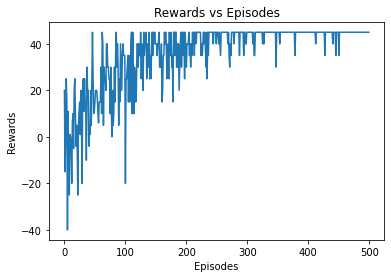

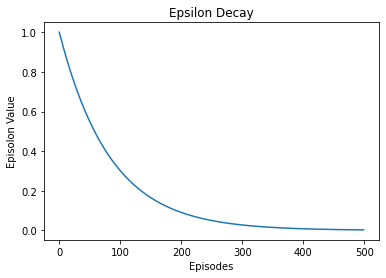

In [47]:
#SARSA Algorithm
from matplotlib import figure

env = GridWorld_Env()

q1_table = np.zeros([env.obs_space.n, env.act_space.n])
output_grid = widgets.Grid(1, 1)
alpha = 0.01
gamma = 0.99
epsilon = 0.9

# For plotting metrics
total_epochs=0
episodes=500
t_e= []
t_r = []
t_a=[]
all_epochs = 0
total_penalties = 0
def choose_action(state):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = env.act_space.sample()
    else:
        action = np.argmax(q1_table[state, :])
    return action

for i in range(episodes):
    state1 = env.reset()
    action1 = choose_action(state1)
    r=0
    epochs, penalties, reward, = 0, 0, 0
    done = False    
    while not done:
        state2, reward, done= env.step(action1)
        action2 = choose_action(state2)          
        #Learning the Q-value
        q1_table[state1, action1] = q1_table[state1, action1] + alpha * (reward + gamma * q1_table[state2, action2] - q1_table[state1, action1])  
        state1 = state2
        action1 = action2
        if reward == -1:
            penalties += 1
        epochs += 1
        r+=reward
        if(i>998):#Displays last iteration/Episode
          with output_grid.output_to(0, 0):
            output_grid.clear_cell()
            # env.render()   
    t_e.append(epochs) #Timesteps for each Episode
    # if done:
    #   print(f"Reached at timestep: {env.tStep}")
    t_r.append(r)#Rewards for each Episode    
    total_epochs += epochs
    total_penalties += penalties
    epsilon= np.exp(-6*i/episodes)
    t_a.append(epsilon)  
plt.plot(t_r)
plt.title('Rewards vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards') 
plt.figure()
plt.plot(t_a)  
plt.title('Epsilon Decay')
plt.xlabel('Episodes')
plt.ylabel('Episolon Value')        
print(penalties)
print("Model Ready! Training finished.\n")
print("Total Episodes:",episodes)
print("Total Timesteps:",total_epochs)
print("Total Penalties:", total_penalties)
print("Average timesteps per episode:" ,{total_epochs / episodes})
print("Average penalties per episode:" ,{total_penalties / episodes})
print("SARSA Table:\n", q1_table)


""


0
Model Ready! Training finished.

Total Episodes: 10
Total Timesteps: 200
Total Penalties: 0
Average timesteps per episode:  {20.0}
Average penalties per episode:  {0.0}
SARSA Table:
 [[-1.59028411e+00  1.55412538e-01  2.95774996e+01  7.37251355e-02]
 [ 4.33121888e+01  4.20429607e-01  2.39917483e-02  1.97181950e-01]
 [ 2.99901974e-03  1.04193602e-03  2.22235347e-05  9.20765493e-01]
 [-1.92193670e-03  5.36224986e-06  0.00000000e+00  1.08711617e-03]
 [ 8.43438877e-02  1.44469235e-02  7.05011294e+00 -1.27475144e+00]
 [ 5.89975295e+01  2.93690389e+00  1.02208323e+00 -2.24073405e+00]
 [ 1.65089161e-01  8.69378601e-03 -7.34672325e-03  5.61686606e+00]
 [-3.29454081e-01  0.00000000e+00 -9.79169400e-04  1.36027148e-02]
 [ 5.89684144e-03 -8.93280966e-01  7.35682665e+00  1.08442103e-01]
 [ 1.60915642e+00  5.64952968e+01  1.46477492e+00  1.58714579e+00]
 [ 1.55883312e-01  4.53381448e-02 -5.00411219e-01  6.05345118e+00]
 [ 6.81690770e-01 -4.90050000e-04 -4.59646817e-02  2.93717195e-02]
 [ 1.071256

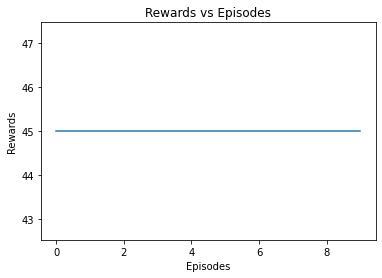

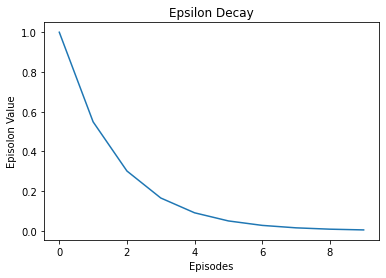

In [48]:
#SARSA Algorithm evaluation
from matplotlib import figure

env = GridWorld_Env()
output_grid = widgets.Grid(1, 1)
alpha = 0.1
gamma = 0.6
epsilon = 0.9

# For plotting metrics
total_epochs=0
episodes=10
t_e= []
t_r = []
t_a=[]
all_epochs = 0
total_penalties = 0
def choose_action(state):
    action = np.argmax(q1_table[state, :])
    return action

for i in range(episodes):
    state1 = env.reset()
    action1 = choose_action(state1)
    r=0
    epochs, penalties, reward, = 0, 0, 0
    done = False    
    while not done:
        state2, reward, done= env.step(action1)
        action2 = choose_action(state2)          
        state1 = state2
        action1 = action2
        if reward == -1:
            penalties += 1
        epochs += 1
        r+=reward
        if(i>998):#Displays last iteration/Episode
          with output_grid.output_to(0, 0):
            output_grid.clear_cell()
            env.render()   
    t_e.append(epochs) #Timesteps for each Episode
    t_r.append(r)#Rewards for each Episode    
    total_epochs += epochs
    total_penalties += penalties
    epsilon= np.exp(-6*i/episodes)
    t_a.append(epsilon)  
plt.plot(t_r)
plt.title('Rewards vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards') 
plt.figure()
plt.plot(t_a)  
plt.title('Epsilon Decay')
plt.xlabel('Episodes')
plt.ylabel('Episolon Value')        
print(penalties)
print("Model Ready! Training finished.\n")
print("Total Episodes:",episodes)
print("Total Timesteps:",total_epochs)
print("Total Penalties:", total_penalties)
print("Average timesteps per episode: ",{total_epochs / episodes})
print("Average penalties per episode: ",{total_penalties / episodes})
print("SARSA Table:\n", q1_table)


Hyper parameter 1 -

gamma(discount factor)

gamma = 0.89

""


0
Model Ready! Training finished.

Total Episodes: 500
Total Timesteps: 4020
Total Penalties: 0
Average timesteps per episode: {8.04}
Average penalties per episode: {0.0}
SARSA Table:
 [[-1.84262159e+00 -3.15286243e-02  5.77205037e+00  8.42142732e-02]
 [ 8.25209113e+00  1.65712304e-01  3.36113502e-03  6.43153614e-02]
 [-3.66569988e-07  1.86573082e-05 -1.12893593e-05  1.18070353e-01]
 [-1.24518550e-03 -1.12997787e-05 -2.27476203e-05  5.42290774e-04]
 [ 8.89779603e-03 -1.70675344e-02  6.52177915e-01 -9.00017228e-01]
 [ 1.09063437e+01  1.80290279e-01  2.41904275e-02 -1.34231214e+00]
 [ 7.39354937e-03  2.11501998e-04 -4.97328265e-03  4.90371756e-01]
 [-2.90497454e-01 -1.89570227e-05 -1.74875985e-03 -2.17487597e-05]
 [ 1.40032935e-07 -6.16957782e-01  1.75024002e+00  2.47661332e-02]
 [ 8.11327613e+00  4.94807133e-01  1.11626363e-01  1.36638975e-01]
 [ 4.73022966e-01  3.38375888e-03 -4.70388924e-01  1.62227089e+00]
 [ 4.07607913e-01 -1.05079899e-07 -4.89373400e-02  1.31708704e-03]
 [ 3.260011

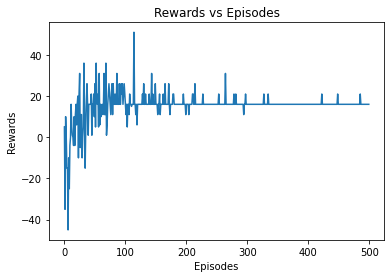

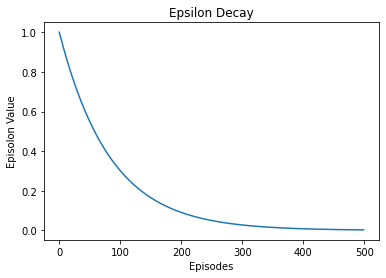

In [50]:
#SARSA Algorithm
from matplotlib import figure

env = GridWorld_Env()

q1_table = np.zeros([env.obs_space.n, env.act_space.n])
output_grid = widgets.Grid(1, 1)
alpha = 0.01
gamma = 0.89
epsilon = 0.9

# For plotting metrics
total_epochs=0
episodes=500
t_e= []
t_r = []
t_a=[]
all_epochs = 0
total_penalties = 0
def choose_action(state):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = env.act_space.sample()
    else:
        action = np.argmax(q1_table[state, :])
    return action

for i in range(episodes):
    state1 = env.reset()
    action1 = choose_action(state1)
    r=0
    epochs, penalties, reward, = 0, 0, 0
    done = False    
    while not done:
        state2, reward, done= env.step(action1)
        action2 = choose_action(state2)          
        #Learning the Q-value
        q1_table[state1, action1] = q1_table[state1, action1] + alpha * (reward + gamma * q1_table[state2, action2] - q1_table[state1, action1])  
        state1 = state2
        action1 = action2
        if reward == -1:
            penalties += 1
        epochs += 1
        r+=reward
        if(i>998):#Displays last iteration/Episode
          with output_grid.output_to(0, 0):
            output_grid.clear_cell()
            # env.render()   
    t_e.append(epochs) #Timesteps for each Episode
    # if done:
    #   print(f"Reached at timestep: {env.tStep}")
    t_r.append(r)#Rewards for each Episode    
    total_epochs += epochs
    total_penalties += penalties
    epsilon= np.exp(-6*i/episodes)
    t_a.append(epsilon)  
plt.plot(t_r)
plt.title('Rewards vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards') 
plt.figure()
plt.plot(t_a)  
plt.title('Epsilon Decay')
plt.xlabel('Episodes')
plt.ylabel('Episolon Value')        
print(penalties)
print("Model Ready! Training finished.\n")
print("Total Episodes:",episodes)
print("Total Timesteps:",total_epochs)
print("Total Penalties:", total_penalties)
print("Average timesteps per episode:",{total_epochs / episodes})
print("Average penalties per episode:", {total_penalties / episodes})
print("SARSA Table:\n", q1_table)


gamma = 0.79

""


0
Model Ready! Training finished.

Total Episodes: 500
Total Timesteps: 9757
Total Penalties: 0
Average timesteps per episode: {total_epochs / episodes}
Average penalties per episode: {total_penalties / episodes}
SARSA Table:
 [[-1.97143385e+00 -2.86874379e-02  5.50192232e+00  3.40159320e-02]
 [ 8.64573442e+00  1.53998000e-01  1.52194692e-03 -4.52515646e-02]
 [ 4.65926887e-02  8.93268900e-05  1.77559826e-07  4.63144254e-03]
 [ 6.96800308e-06  4.62204966e-09  0.00000000e+00  9.87490192e-05]
 [ 4.33639216e-02 -5.18025119e-03  6.94745798e-01 -1.20911353e+00]
 [ 1.23884653e+01  5.76987411e-02  3.73693054e-02 -1.75192665e+00]
 [ 5.16814301e-02  8.37324625e-06 -3.60764462e-04  9.69156916e-01]
 [-9.95000000e-02  6.50961092e-08  1.89478839e-06  1.61439352e-03]
 [ 1.24593323e-02 -9.16974234e-01  4.21018007e+00  4.90320223e-02]
 [ 1.01922915e+01  1.58597950e+00  1.21591583e+00  9.07778106e-01]
 [ 5.79862008e+00  1.76785123e-02 -3.78530708e-01  5.24916905e-01]
 [ 4.07607913e-01  3.80188629e-07 -4

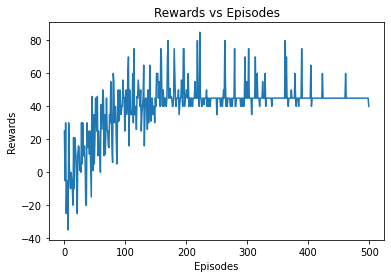

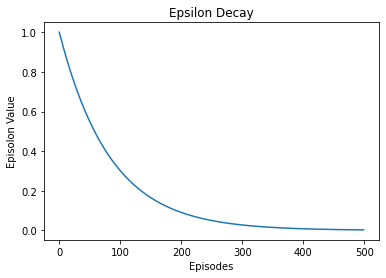

In [52]:
#SARSA Algorithm
from matplotlib import figure

env = GridWorld_Env()

q1_table = np.zeros([env.obs_space.n, env.act_space.n])
output_grid = widgets.Grid(1, 1)
alpha = 0.01
gamma = 0.79
epsilon = 0.9

# For plotting metrics
total_epochs=0
episodes=500
t_e= []
t_r = []
t_a=[]
all_epochs = 0
total_penalties = 0
def choose_action(state):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = env.act_space.sample()
    else:
        action = np.argmax(q1_table[state, :])
    return action

for i in range(episodes):
    state1 = env.reset()
    action1 = choose_action(state1)
    r=0
    epochs, penalties, reward, = 0, 0, 0
    done = False    
    while not done:
        state2, reward, done= env.step(action1)
        action2 = choose_action(state2)          
        #Learning the Q-value
        q1_table[state1, action1] = q1_table[state1, action1] + alpha * (reward + gamma * q1_table[state2, action2] - q1_table[state1, action1])  
        state1 = state2
        action1 = action2
        if reward == -1:
            penalties += 1
        epochs += 1
        r+=reward
        if(i>998):#Displays last iteration/Episode
          with output_grid.output_to(0, 0):
            output_grid.clear_cell()
            # env.render()   
    t_e.append(epochs) #Timesteps for each Episode
    # if done:
    #   print(f"Reached at timestep: {env.tStep}")
    t_r.append(r)#Rewards for each Episode    
    total_epochs += epochs
    total_penalties += penalties
    epsilon= np.exp(-6*i/episodes)
    t_a.append(epsilon)  
plt.plot(t_r)
plt.title('Rewards vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards') 
plt.figure()
plt.plot(t_a)  
plt.title('Epsilon Decay')
plt.xlabel('Episodes')
plt.ylabel('Episolon Value')        
print(penalties)
print("Model Ready! Training finished.\n")
print("Total Episodes:",episodes)
print("Total Timesteps:",total_epochs)
print("Total Penalties:", total_penalties)
print("Average timesteps per episode: {total_epochs / episodes}")
print("Average penalties per episode: {total_penalties / episodes}")
print("SARSA Table:\n", q1_table)


Gamma = 0.69

""


0
Model Ready! Training finished.

Total Episodes: 500
Total Timesteps: 3965
Total Penalties: 0
Average timesteps per episode: {total_epochs / episodes}
Average penalties per episode: {total_penalties / episodes}
SARSA Table:
 [[-1.53989326e+00 -2.03109071e-03  2.65393475e+00 -2.68461092e-02]
 [ 4.87947258e+00  7.23354087e-02  6.67363129e-04  2.15262941e-02]
 [ 7.37867987e-04  2.78228499e-05 -2.07147156e-05  5.93153199e-02]
 [-2.97312012e-03 -6.99267888e-06  6.94093939e-09  3.65999422e-05]
 [ 4.10028324e-01  6.10495042e-05  3.32397108e-02 -7.10152911e-01]
 [ 8.19065576e+00  5.19699625e-02  5.37999898e-03 -1.25240684e+00]
 [ 1.61340752e-01  8.45626696e-06 -4.42289812e-03  5.13207053e-03]
 [-3.87711772e-01 -4.05659185e-05 -1.65209753e-03  5.43238591e-04]
 [ 3.93683359e-04 -6.59064706e-01  3.07175529e+00  4.83410890e-02]
 [ 5.60390736e+00  2.20625867e-01  1.81667441e-01  1.52066534e-01]
 [ 6.79117967e-01  2.38630120e-03 -6.71912424e-01  2.52594959e+00]
 [ 7.87525123e-01 -1.40630370e-05 -3

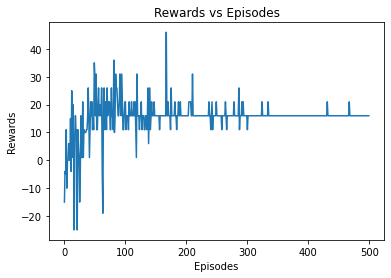

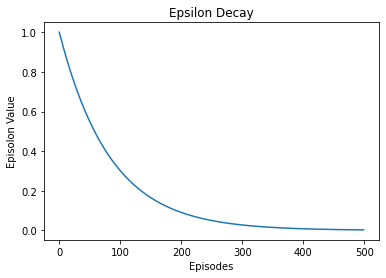

In [53]:
#SARSA Algorithm
from matplotlib import figure

env = GridWorld_Env()

q1_table = np.zeros([env.obs_space.n, env.act_space.n])
output_grid = widgets.Grid(1, 1)
alpha = 0.01
gamma = 0.69
epsilon = 0.9

# For plotting metrics
total_epochs=0
episodes=500
t_e= []
t_r = []
t_a=[]
all_epochs = 0
total_penalties = 0
def choose_action(state):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = env.act_space.sample()
    else:
        action = np.argmax(q1_table[state, :])
    return action

for i in range(episodes):
    state1 = env.reset()
    action1 = choose_action(state1)
    r=0
    epochs, penalties, reward, = 0, 0, 0
    done = False    
    while not done:
        state2, reward, done= env.step(action1)
        action2 = choose_action(state2)          
        #Learning the Q-value
        q1_table[state1, action1] = q1_table[state1, action1] + alpha * (reward + gamma * q1_table[state2, action2] - q1_table[state1, action1])  
        state1 = state2
        action1 = action2
        if reward == -1:
            penalties += 1
        epochs += 1
        r+=reward
        if(i>998):#Displays last iteration/Episode
          with output_grid.output_to(0, 0):
            output_grid.clear_cell()
            # env.render()   
    t_e.append(epochs) #Timesteps for each Episode
    # if done:
    #   print(f"Reached at timestep: {env.tStep}")
    t_r.append(r)#Rewards for each Episode    
    total_epochs += epochs
    total_penalties += penalties
    epsilon= np.exp(-6*i/episodes)
    t_a.append(epsilon)  
plt.plot(t_r)
plt.title('Rewards vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards') 
plt.figure()
plt.plot(t_a)  
plt.title('Epsilon Decay')
plt.xlabel('Episodes')
plt.ylabel('Episolon Value')        
print(penalties)
print("Model Ready! Training finished.\n")
print("Total Episodes:",episodes)
print("Total Timesteps:",total_epochs)
print("Total Penalties:", total_penalties)
print("Average timesteps per episode: {total_epochs / episodes}")
print("Average penalties per episode: {total_penalties / episodes}")
print("SARSA Table:\n", q1_table)


Hyper parameter 2 - Episodes

Episodes = 400

""


0
Model Ready! Training finished.

Total Episodes: 400
Total Timesteps: 7373
Total Penalties: 0
Average timesteps per episode: {total_epochs / episodes}
Average penalties per episode: {total_penalties / episodes}
SARSA Table:
 [[-1.68335399e+00 -2.11153522e-02  1.99415155e+01  9.13771665e-02]
 [ 3.29152093e+01  5.06939501e-01  1.53264007e-02  9.66706922e-02]
 [ 1.05857681e-02  9.07266389e-04 -2.39910760e-05  5.89042861e-01]
 [-2.39399971e-03 -4.43704853e-06 -7.07422715e-06  1.78600844e-03]
 [ 5.07022805e-02  9.26840519e-03  5.00882625e+00 -6.81996286e-01]
 [ 4.94659403e+01  1.62199766e+00  3.10976917e-01 -1.92385886e+00]
 [ 4.29517117e-02  3.57686552e-03 -5.09195092e-03  3.13275828e+00]
 [-3.79273686e-01  6.89808282e-07 -3.32773208e-03 -2.36330586e-05]
 [ 3.43713928e-04 -4.71119717e-01  3.45530182e+00  2.55063107e-02]
 [ 5.86325199e-01  4.69535276e+01  4.27645492e-01  5.40337262e-01]
 [ 2.39810735e+00  3.52848813e-03 -3.36865049e-01  2.30279051e-01]
 [ 5.18896515e-01 -2.40870122e-03 -1

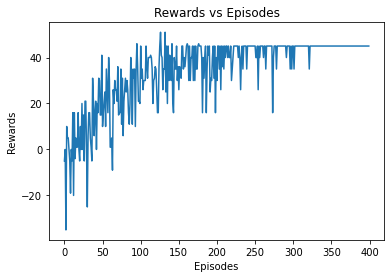

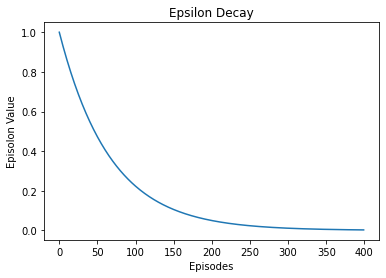

In [54]:
#SARSA Algorithm
from matplotlib import figure

env = GridWorld_Env()

q1_table = np.zeros([env.obs_space.n, env.act_space.n])
output_grid = widgets.Grid(1, 1)
alpha = 0.01
gamma = 0.99
epsilon = 0.9

# For plotting metrics
total_epochs=0
episodes=400
t_e= []
t_r = []
t_a=[]
all_epochs = 0
total_penalties = 0
def choose_action(state):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = env.act_space.sample()
    else:
        action = np.argmax(q1_table[state, :])
    return action

for i in range(episodes):
    state1 = env.reset()
    action1 = choose_action(state1)
    r=0
    epochs, penalties, reward, = 0, 0, 0
    done = False    
    while not done:
        state2, reward, done= env.step(action1)
        action2 = choose_action(state2)          
        #Learning the Q-value
        q1_table[state1, action1] = q1_table[state1, action1] + alpha * (reward + gamma * q1_table[state2, action2] - q1_table[state1, action1])  
        state1 = state2
        action1 = action2
        if reward == -1:
            penalties += 1
        epochs += 1
        r+=reward
        if(i>998):#Displays last iteration/Episode
          with output_grid.output_to(0, 0):
            output_grid.clear_cell()
            # env.render()   
    t_e.append(epochs) #Timesteps for each Episode
    # if done:
    #   print(f"Reached at timestep: {env.tStep}")
    t_r.append(r)#Rewards for each Episode    
    total_epochs += epochs
    total_penalties += penalties
    epsilon= np.exp(-6*i/episodes)
    t_a.append(epsilon)  
plt.plot(t_r)
plt.title('Rewards vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards') 
plt.figure()
plt.plot(t_a)  
plt.title('Epsilon Decay')
plt.xlabel('Episodes')
plt.ylabel('Episolon Value')        
print(penalties)
print("Model Ready! Training finished.\n")
print("Total Episodes:",episodes)
print("Total Timesteps:",total_epochs)
print("Total Penalties:", total_penalties)
print("Average timesteps per episode: {total_epochs / episodes}")
print("Average penalties per episode: {total_penalties / episodes}")
print("SARSA Table:\n", q1_table)


Hyper parameter - 2

Episodes = 450

""


0
Model Ready! Training finished.

Total Episodes: 450
Total Timesteps: 8819
Total Penalties: 0
Average timesteps per episode: {total_epochs / episodes}
Average penalties per episode: {total_penalties / episodes}
SARSA Table:
 [[-1.59673534e+00  2.69048890e-01  2.63501907e+01  1.06510936e-01]
 [ 3.99100603e+01  4.85689155e-01  1.06844694e-02  7.57536330e-02]
 [ 3.70134235e-03  1.45697907e-06 -8.86027347e-06  5.32801228e-01]
 [-4.71796290e-03 -4.77968471e-05 -8.24632356e-05  3.78610954e-04]
 [ 3.47178436e-02  1.59423525e-02  3.58838861e+00 -1.02583832e+00]
 [ 5.59526714e+01  3.57097382e+00  3.73467002e-01 -2.14676766e+00]
 [ 3.71773358e-02  2.00801054e-04 -2.32809356e-03  4.00962619e+00]
 [-2.90866921e-01 -1.95740524e-05 -1.47024753e-03  1.57416558e-02]
 [ 8.45841689e-04 -8.34631635e-01  5.96317647e+00  5.63233885e-02]
 [ 1.00154603e+00  5.34480188e+01  1.10352923e+00  1.23252977e+00]
 [ 4.84359687e-01  7.93452350e-03 -4.52223072e-01  5.95802476e+00]
 [ 6.27970474e-01 -4.80099756e-04 -9

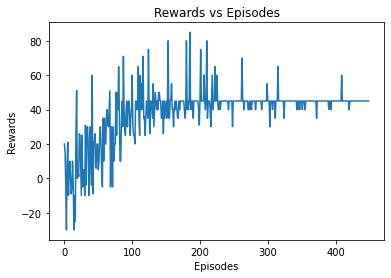

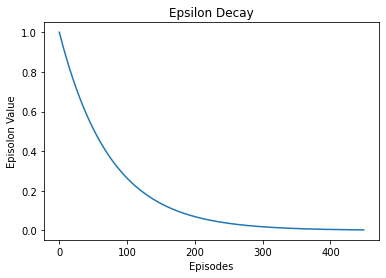

In [55]:
#SARSA Algorithm
from matplotlib import figure

env = GridWorld_Env()

q1_table = np.zeros([env.obs_space.n, env.act_space.n])
output_grid = widgets.Grid(1, 1)
alpha = 0.01
gamma = 0.99
epsilon = 0.9

# For plotting metrics
total_epochs=0
episodes=450
t_e= []
t_r = []
t_a=[]
all_epochs = 0
total_penalties = 0
def choose_action(state):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = env.act_space.sample()
    else:
        action = np.argmax(q1_table[state, :])
    return action

for i in range(episodes):
    state1 = env.reset()
    action1 = choose_action(state1)
    r=0
    epochs, penalties, reward, = 0, 0, 0
    done = False    
    while not done:
        state2, reward, done= env.step(action1)
        action2 = choose_action(state2)          
        #Learning the Q-value
        q1_table[state1, action1] = q1_table[state1, action1] + alpha * (reward + gamma * q1_table[state2, action2] - q1_table[state1, action1])  
        state1 = state2
        action1 = action2
        if reward == -1:
            penalties += 1
        epochs += 1
        r+=reward
        if(i>998):#Displays last iteration/Episode
          with output_grid.output_to(0, 0):
            output_grid.clear_cell()
            # env.render()   
    t_e.append(epochs) #Timesteps for each Episode
    # if done:
    #   print(f"Reached at timestep: {env.tStep}")
    t_r.append(r)#Rewards for each Episode    
    total_epochs += epochs
    total_penalties += penalties
    epsilon= np.exp(-6*i/episodes)
    t_a.append(epsilon)  
plt.plot(t_r)
plt.title('Rewards vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards') 
plt.figure()
plt.plot(t_a)  
plt.title('Epsilon Decay')
plt.xlabel('Episodes')
plt.ylabel('Episolon Value')        
print(penalties)
print("Model Ready! Training finished.\n")
print("Total Episodes:",episodes)
print("Total Timesteps:",total_epochs)
print("Total Penalties:", total_penalties)
print("Average timesteps per episode: {total_epochs / episodes}")
print("Average penalties per episode: {total_penalties / episodes}")
print("SARSA Table:\n", q1_table)


Episodes = 300

""


0
Model Ready! Training finished.

Total Episodes: 300
Total Timesteps: 5321
Total Penalties: 0
Average timesteps per episode: {total_epochs / episodes}
Average penalties per episode: {total_penalties / episodes}
SARSA Table:
 [[-1.20445872e+00  3.50520748e-02  1.22469584e+01 -1.86278992e-02]
 [ 2.35102750e+01  1.81403145e-01  4.10314672e-04 -2.47966069e-03]
 [ 1.68094644e-03  1.70751889e-05  1.85490372e-09  4.27921541e-02]
 [-9.84447224e-04  6.02715350e-09  0.00000000e+00 -4.80469130e-08]
 [ 6.20782246e-03 -1.87481371e-02  1.64341092e+00 -2.89779908e-01]
 [ 3.92407373e+01  1.13636508e+00  5.20737932e-02 -1.66453640e+00]
 [ 4.33522329e-01  7.89716536e-05 -2.40041958e-03  7.05958669e-02]
 [-2.91938375e-01  1.89602947e-09  6.02775627e-07  8.94596352e-04]
 [ 3.75369493e-04 -5.19404431e-02  2.76080007e+00  5.23997810e-03]
 [ 2.57741707e-01  3.67352552e+01  4.19625750e-01  3.19825635e-01]
 [ 3.08854616e+00  4.70856371e-03 -5.99045069e-01  2.93888540e-01]
 [ 4.63531833e-01 -3.85537532e-03 -9

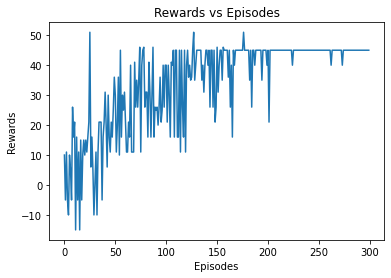

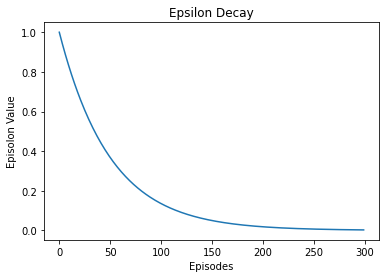

In [56]:
#SARSA Algorithm
from matplotlib import figure

env = GridWorld_Env()

q1_table = np.zeros([env.obs_space.n, env.act_space.n])
output_grid = widgets.Grid(1, 1)
alpha = 0.01
gamma = 0.99
epsilon = 0.9

# For plotting metrics
total_epochs=0
episodes=300
t_e= []
t_r = []
t_a=[]
all_epochs = 0
total_penalties = 0
def choose_action(state):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = env.act_space.sample()
    else:
        action = np.argmax(q1_table[state, :])
    return action

for i in range(episodes):
    state1 = env.reset()
    action1 = choose_action(state1)
    r=0
    epochs, penalties, reward, = 0, 0, 0
    done = False    
    while not done:
        state2, reward, done= env.step(action1)
        action2 = choose_action(state2)          
        #Learning the Q-value
        q1_table[state1, action1] = q1_table[state1, action1] + alpha * (reward + gamma * q1_table[state2, action2] - q1_table[state1, action1])  
        state1 = state2
        action1 = action2
        if reward == -1:
            penalties += 1
        epochs += 1
        r+=reward
        if(i>998):#Displays last iteration/Episode
          with output_grid.output_to(0, 0):
            output_grid.clear_cell()
            # env.render()   
    t_e.append(epochs) #Timesteps for each Episode
    # if done:
    #   print(f"Reached at timestep: {env.tStep}")
    t_r.append(r)#Rewards for each Episode    
    total_epochs += epochs
    total_penalties += penalties
    epsilon= np.exp(-6*i/episodes)
    t_a.append(epsilon)  
plt.plot(t_r)
plt.title('Rewards vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards') 
plt.figure()
plt.plot(t_a)  
plt.title('Epsilon Decay')
plt.xlabel('Episodes')
plt.ylabel('Episolon Value')        
print(penalties)
print("Model Ready! Training finished.\n")
print("Total Episodes:",episodes)
print("Total Timesteps:",total_epochs)
print("Total Penalties:", total_penalties)
print("Average timesteps per episode: {total_epochs / episodes}")
print("Average penalties per episode: {total_penalties / episodes}")
print("SARSA Table:\n", q1_table)
